<a href="https://colab.research.google.com/github/NahuelCostaCortez/rapidae/blob/main/examples/vq_vae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VQ VAE with MNIST dataset

A Vector Quantized-Variational Autoencoder (VQ-VAE) is an extension of the traditional Variational Autoencoder (VAE) that incorporates discrete latent variables. In VQ-VAE, the encoder maps the input data to continuous latent variables, and a discrete codebook is introduced to quantize these continuous variables. This quantization helps to introduce a form of discrete structure into the latent space, making it more interpretable and potentially capturing more meaningful representations.

The key components of a VQ-VAE include:

1. **Encoder:** This part of the network maps the input data to continuous latent variables.

2. **Codebook:** A set of discrete vectors that serve as the representative centroids of the quantized latent space.

3. **Quantization:** The continuous latent variables from the encoder are quantized by finding the closest vector in the codebook. This discrete representation is then used in the subsequent stages.

4. **Decoder:** The decoder reconstructs the input data using both the quantized discrete latent variables and the continuous variables.

VQ-VAEs are particularly useful when dealing with data that exhibits a mix of continuous and discrete patterns. They find applications in generative tasks where having a structured and interpretable latent space is essential, such as in generating diverse and meaningful samples in image and speech synthesis.

In [1]:
# Install the library

!pip install rapidae

In [3]:
from keras import utils
from rapidae.data import load_MNIST
from rapidae.models.base import Encoder_Conv_VQ_MNIST, Decoder_Conv_VQ_MNIST
from rapidae.models import VQ_VAE
from rapidae.pipelines import TrainingPipeline
from rapidae.evaluate import plot_reconstructions

2024-01-11 20:17:52.748857: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-11 20:17:52.748879: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-11 20:17:52.749545: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-11 20:17:52.754569: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-11 20:17:53.410016: W tensorflow/compiler/tf2

### Data

Download and preprocess the dataset. In this example, the selected dataset is the well-known MNIST composed of handwritten digit images.

In this case since we are using convolutional layers we don't need to flatten the data.

Train and test labels are converted into one-hot encoding.

In [4]:
# Load MNIST dataset
x_train, y_train, x_test, y_test = load_MNIST()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Obtaint number of clasess
n_classes = len(set(y_train))

# Convert labels to categorical
y_train = utils.to_categorical(y_train, n_classes)
y_test = utils.to_categorical(y_test, n_classes)

2024-01-11 20:17:53 [INFO]: train-images-idx3-ubyte.gz already exists.
2024-01-11 20:17:53 [INFO]: train-labels-idx1-ubyte.gz already exists.
2024-01-11 20:17:53 [INFO]: t10k-images-idx3-ubyte.gz already exists.
2024-01-11 20:17:53 [INFO]: t10k-labels-idx1-ubyte.gz already exists.


### Model


Model's creation step. The selected encoder and decoder are extracted for the Keras tutorial. They are almost similar with the ones used in the vanilla vae example for MNIST, but with a few changes related to latent space, since in VQ-vae we don't have available 'z_mean' and 'z_log_var' arrays.

In [5]:
# Model creation
model = VQ_VAE(input_dim=(x_train.shape[1], x_train.shape[2]),
               latent_dim=2, encoder=Encoder_Conv_VQ_MNIST, decoder=Decoder_Conv_VQ_MNIST, layers_conf=[32, 64])

### Training

Define the training pipeline. Here you can fix some hyperparameters related to the training phase of the autoencoder, like learning rate, bath size, numer of epochs, etc. 
Also you can define callbacks to the model.

In [6]:
pipe = TrainingPipeline(name='training_pipeline_mnist_vq_vae',
                        model=model, num_epochs=20)

trained_model = pipe(x=x_train, y=y_train)

2024-01-11 20:17:54 [INFO]: +++ training_pipeline_mnist_vq_vae +++
2024-01-11 20:17:54 [INFO]: Creating folder in ../output_dir/training_pipeline_mnist_vq_vae_2024-01-11_20-17-54


Epoch 1/20


/home/lucaspc/venvs/keras_core/lib/python3.11/site-packages/keras/src/backend/common/backend_utils.py:88: UserWarning: You might experience inconsistencies accross backends when calling conv transpose with kernel_size=3, stride=2, dilation_rate=1, padding=same, output_padding=1.
  warnings.warn(



Epoch 1: loss improved from inf to 0.01782, saving model to ../output_dir/training_pipeline_mnist_vq_vae_2024-01-11_20-17-54/model.weights.h5
469/469 - 3s - 7ms/step - loss: 0.0178 - reconstruction_loss: 0.0150 - vq_loss: 0.0028
Epoch 2/20

Epoch 2: loss improved from 0.01782 to 0.00729, saving model to ../output_dir/training_pipeline_mnist_vq_vae_2024-01-11_20-17-54/model.weights.h5
469/469 - 3s - 7ms/step - loss: 0.0073 - reconstruction_loss: 0.0070 - vq_loss: 3.1104e-04
Epoch 3/20

Epoch 3: loss improved from 0.00729 to 0.00635, saving model to ../output_dir/training_pipeline_mnist_vq_vae_2024-01-11_20-17-54/model.weights.h5
469/469 - 3s - 7ms/step - loss: 0.0063 - reconstruction_loss: 0.0060 - vq_loss: 3.5204e-04
Epoch 4/20

Epoch 4: loss improved from 0.00635 to 0.00591, saving model to ../output_dir/training_pipeline_mnist_vq_vae_2024-01-11_20-17-54/model.weights.h5
469/469 - 3s - 7ms/step - loss: 0.0059 - reconstruction_loss: 0.0056 - vq_loss: 3.5495e-04
Epoch 5/20

Epoch 5: lo

### Evaluation

Let's now check the performance of this model. The original images are listed in the first row and the reconstructions in the second. These results look decent but you can play with some specific hyperparameters like the number and dimensionality of the embedding to improve this.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


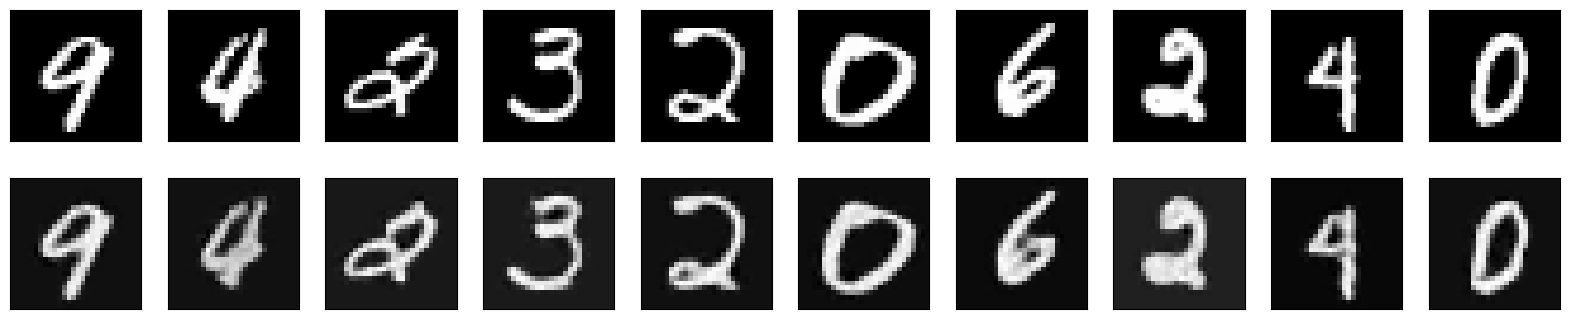

In [7]:
outputs = trained_model.predict(x_test)

plot_reconstructions(x_test, outputs['recon'])